# 1. Import and Install Dependencies

In [ ]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from utils.mediapipe_fun import mediapipe_detection, draw_landmarks, draw_styled_landmarks

# 2. Keypoints using MP Holistic

## webcam function test

In [3]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
while cap.isOpened():
    # Read feed
    ret, frame = cap.read()
    # Show to screen
    cv2.imshow('OpenCV Feed', frame)
    # Break gracefully
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [4]:
cv2.waitKey(1)
cv2.destroyAllWindows()

## make a process function and check results

In [6]:
 # create variables to store Holistic model
mp_holistic = mp.solutions.holistic  # for downloading the model and leveraging that model

In [7]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)  # call function
        print(results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
cv2.waitKey(1)
cv2.destroyAllWindows()

In [8]:
results.face_landmarks
results.face_landmarks.landmark
len(results.face_landmarks.landmark)

[x: 0.6069883
y: 0.76464665
z: -0.031911105
, x: 0.61504245
y: 0.68419015
z: -0.06274752
, x: 0.60963744
y: 0.70444846
z: -0.031897068
, x: 0.6060622
y: 0.6006701
z: -0.050935633
, x: 0.6168713
y: 0.66058177
z: -0.06737588
, x: 0.61729467
y: 0.627621
z: -0.06348774
, x: 0.616744
y: 0.5425008
z: -0.034000363
, x: 0.5230366
y: 0.5118544
z: -0.0013901428
, x: 0.6189033
y: 0.4755032
z: -0.02818206
, x: 0.6209219
y: 0.4416353
z: -0.031877033
, x: 0.6249107
y: 0.32243818
z: -0.022693343
, x: 0.6061801
y: 0.7773235
z: -0.029779451
, x: 0.6048824
y: 0.7868158
z: -0.02516884
, x: 0.6036937
y: 0.79039884
z: -0.019395396
, x: 0.60363364
y: 0.7972451
z: -0.015113133
, x: 0.6032902
y: 0.80896324
z: -0.016579151
, x: 0.6025012
y: 0.82275224
z: -0.018398272
, x: 0.60123813
y: 0.83501226
z: -0.015941022
, x: 0.59856445
y: 0.8451512
z: -0.0037065535
, x: 0.6132213
y: 0.69479495
z: -0.056416158
, x: 0.5999136
y: 0.6902891
z: -0.041556057
, x: 0.4746135
y: 0.39645576
z: 0.044288874
, x: 0.5584955
y: 0.54

## visualize the landmarks

In [9]:
# create a variable to drawing utilities
mp_drawing = mp.solutions.drawing_utils # for drawing points on the face

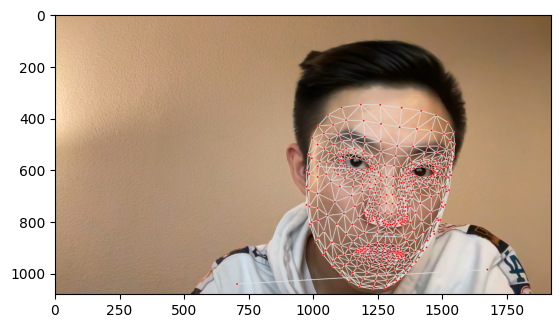

In [10]:
# test our function in the last frame
draw_landmarks(frame, results, mp_drawing, mp_holistic)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

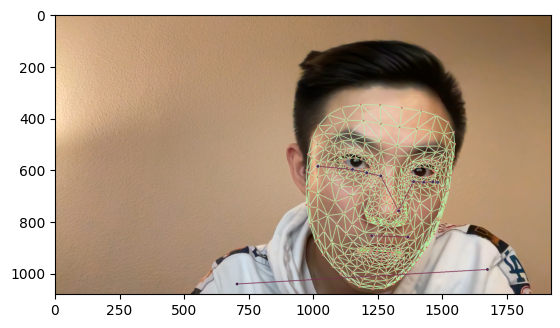

In [11]:
draw_styled_landmarks(frame, results, mp_drawing, mp_holistic)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## real-time with landmarks

In [24]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results, mp_drawing, mp_holistic)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [25]:
cv2.waitKey(1)
cv2.destroyAllWindows()

# 3. Extract Keypoint Values

You can get the landmarks result.

<img src="./images/results.png" alt="image of result" width="400"/>

In [16]:
results.pose_landmarks.landmark

[x: 0.43819734
y: 0.53702044
z: -0.66217494
visibility: 0.9999275
, x: 0.47193626
y: 0.44636744
z: -0.6344227
visibility: 0.9998422
, x: 0.492618
y: 0.44497964
z: -0.6342618
visibility: 0.99985963
, x: 0.50828224
y: 0.44361752
z: -0.6344843
visibility: 0.9998501
, x: 0.40202367
y: 0.4450249
z: -0.6230861
visibility: 0.9998494
, x: 0.38015682
y: 0.44358325
z: -0.622289
visibility: 0.99985635
, x: 0.3668217
y: 0.44413623
z: -0.6226389
visibility: 0.99983984
, x: 0.5393068
y: 0.46104732
z: -0.369268
visibility: 0.99985677
, x: 0.34462988
y: 0.47403044
z: -0.29455566
visibility: 0.9998646
, x: 0.47948694
y: 0.62582105
z: -0.55648726
visibility: 0.99990314
, x: 0.39594743
y: 0.6379
z: -0.5353224
visibility: 0.9998916
, x: 0.7067951
y: 0.9080802
z: -0.23451443
visibility: 0.9986887
, x: 0.2406092
y: 0.94077903
z: -0.22883967
visibility: 0.9988846
, x: 0.81660306
y: 1.4162395
z: -0.30460212
visibility: 0.19818044
, x: 0.21025485
y: 1.4411689
z: -0.35214576
visibility: 0.1629444
, x: 0.7883995

In [27]:
#The 33 Landmark objects correspond to specific parts of the body, such as the nose, eyes, shoulders, elbows, wrists, hips, knees, and ankles, 
# and are identified by a unique index ranging from 0 to 32. 
len(results.pose_landmarks.landmark) # for one frame

33

In [28]:
len(results.face_landmarks.landmark) 

468

## Concatenate landmark coordinates and visibility

In [21]:
# you can get 4 values
results.pose_landmarks.landmark[0].x
results.pose_landmarks.landmark[0].y
results.pose_landmarks.landmark[0].z
results.pose_landmarks.landmark[0].visibility

0.9999275207519531

In [30]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

len(pose)

33

In [31]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132) # same function as above
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [35]:
def extract_concatenate_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [36]:
result_test = extract_concatenate_keypoints(results)

In [40]:
len(result_test)

1662

In [39]:
468*3+33*4+21*3+21*3

1662

In [124]:
np.save('0', result_test)

In [125]:
np.load('0.npy')

array([ 0.3835876 ,  0.47759178, -0.77978629, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [9]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('data') 

# Actions that we try to detect
actions_list = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
sequences_number = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [159]:
for action in actions_list: 
    for sequence in range(sequences_number):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [160]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions_list:
        # Loop through sequences aka videos
        for sequence in range(sequences_number):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_concatenate_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [158]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
label_map = {label:num for num, label in enumerate(actions_list)}

In [163]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [65]:
sequences, labels = [], []
for action in actions_list:
    for sequence in range(sequences_number):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [66]:
np.array(sequences).shape

(90, 30, 1662)

In [67]:
np.array(labels).shape

(90,)

In [68]:
X = np.array(sequences)

In [69]:
X.shape

(90, 30, 1662)

In [70]:
y = to_categorical(labels).astype(int)

In [ ]:
y

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [73]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [12]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions_list.shape[0], activation='softmax'))

In [ ]:
res = [.7, 0.2, 0.1]

In [ ]:
actions[np.argmax(res)]

In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [196]:
res = model.predict(X_test)

In [213]:
actions_list[np.argmax(res[4])]

'hello'

In [214]:
actions_list[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [216]:
model.save('action.h5')

In [217]:
del model

In [15]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [16]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [90]:
yhat = model.predict(X_test)

In [91]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [92]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [93]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [21]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions_list, image, colors))

In [19]:
sequence.reverse()

In [23]:
len(sequence)

1

In [51]:
sequence.append('def')

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_concatenate_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions_list[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions_list[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions_list[np.argmax(res)])
                else:
                    sentence.append(actions_list[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions_list, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)